# Imports

In [39]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Load dataset and split into train, test and validation sets

In [40]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Scale the pixel intensities down to 0-1

In [41]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [42]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(y_train)

[9 0 0 ... 9 0 2]


Initialize the weights using He-initiliazation, suitable for the ReLU activation function because it compensates for the dying ReLU problem

In [43]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal")
])

print(model.summary())

/Users/mathiaslovnes/Desktop/H2025/MachineLearning/MachineLearning/NTNU-IE500618-Assignment-3/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

None


In [44]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [45]:
history = model.fit(X_train, y_train, epochs=25,
                     validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8064 - loss: 0.5582 - val_accuracy: 0.8498 - val_loss: 0.3992
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.3942 - val_accuracy: 0.8628 - val_loss: 0.3652
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8767 - loss: 0.3432 - val_accuracy: 0.8674 - val_loss: 0.3521
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8905 - loss: 0.3069 - val_accuracy: 0.8706 - val_loss: 0.3464
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9015 - loss: 0.2771 - val_accuracy: 0.8718 - val_loss: 0.3444
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9122 - loss: 0.2508 - val_accuracy: 0.8738 - val_loss: 0.3449
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9218 - loss: 0.2268 - val_accuracy: 0.8758 - val_loss: 0.3483
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9309 - loss: 0.2045 - 

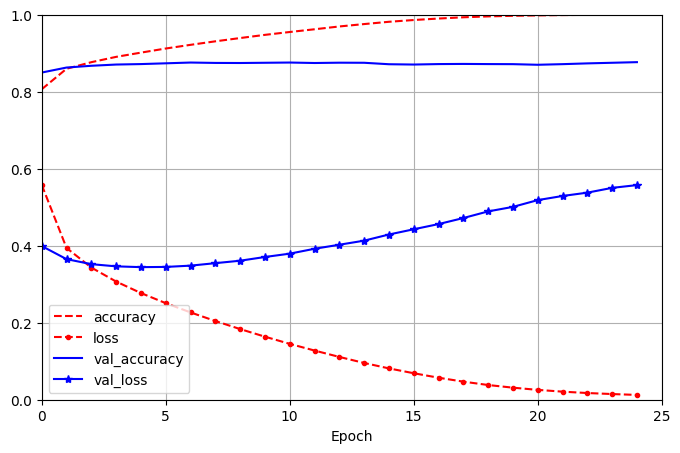

In [46]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 25], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step


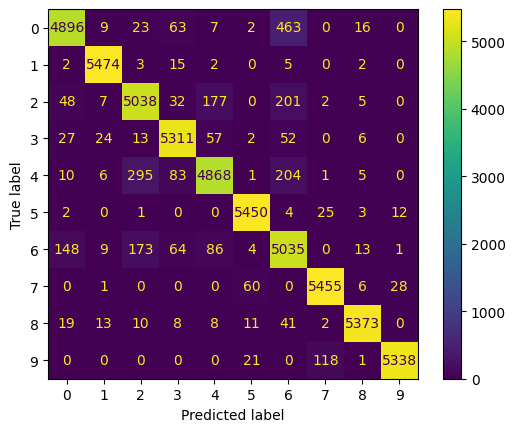

In [47]:
y_prediction_proba = model.predict(X_test)
y_prediction = y_prediction_proba.argmax(axis=1)
predictions_proba = model.predict(X_train)
predictions = predictions_proba.argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(y_train, predictions)
plt.show()

In [49]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.8768 - loss: 0.5574


[0.557443380355835, 0.876800000667572]